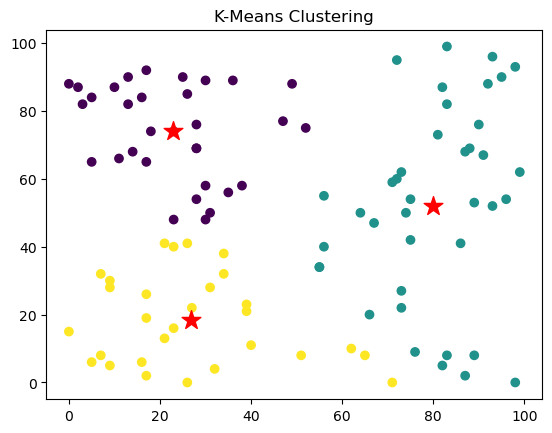

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class KMeansClustering:

    def __init__(self, k=3):
        self.k = k
        self.centroids = None

    @staticmethod
    def euclidean_distance(data_point, centroids):
        return np.sqrt(np.sum((centroids - data_point) ** 2, axis=1))

    def fit(self, X, max_iterations=200):
        # Initialize centroids randomly within the range of the dataset
        self.centroids = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0), size=(self.k, X.shape[1]))

        for _ in range(max_iterations):
            # Assign clusters
            y = []
            for data_point in X:
                distances = KMeansClustering.euclidean_distance(data_point, self.centroids)
                cluster_num = np.argmin(distances)
                y.append(cluster_num)

            y = np.array(y)

            # Update centroids
            cluster_centers = []
            for i in range(self.k):
                indices = np.argwhere(y == i).flatten()
                if len(indices) == 0:
                    # If no points assigned, retain the old centroid
                    cluster_centers.append(self.centroids[i])
                else:
                    # Update centroid to mean of cluster points
                    cluster_centers.append(np.mean(X[indices], axis=0))

            # Check for convergence
            cluster_centers = np.array(cluster_centers)
            if np.max(np.linalg.norm(self.centroids - cluster_centers, axis=1)) < 0.0001:
                break
            self.centroids = cluster_centers

        return y

# Generate random points
random_points = np.random.randint(0, 100, size=(100, 2))

# Fit KMeans
kmeans = KMeansClustering(k=3)
labels = kmeans.fit(random_points)

# Plot the results
plt.scatter(random_points[:, 0], random_points[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c=range(len(kmeans.centroids)), marker='*', s=200)
plt.title("K-Means Clustering")
plt.show()
